In [30]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi/Capstone/load_data.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/gener

### Houston Astros, moved to American League in 2013

In [3]:
astros_df = final_drop[final_drop['team']=='HOU'].sort_values('date',axis=0)

In [4]:
astros_df = team_data_clean(astros_df)

/home/jovyan/dsi/Capstone/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [5]:
astros_df = add_rival('HOU', astros_df)

In [6]:
new_data=pd.read_pickle('data/test_data_mlb.pkl')

In [7]:
astros_new = new_data[new_data['team'] == 'HOU'].sort_values('date',axis=0)

In [8]:
astros_new = test_data_clean(astros_new)

/home/jovyan/dsi/Capstone/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [9]:
astros_new = add_rival('HOU', astros_new)

In [10]:
astros_new = pd.concat([astros_df, astros_new],axis=0)

In [11]:
astros_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 23370 to 890
Data columns (total 70 columns):
attendance         2237 non-null int64
date               2237 non-null datetime64[ns]
div_rank           2237 non-null int64
double_header      2237 non-null float64
gb                 2237 non-null float64
opening_day        2237 non-null float64
opponent           2237 non-null object
record             2237 non-null float64
runs_allowed_ma    2237 non-null float64
runs_ma            2237 non-null float64
runs_pg            2237 non-null float64
streak             2237 non-null int64
team               2237 non-null object
1990               2237 non-null int64
1991               2237 non-null int64
1992               2237 non-null int64
1993               2237 non-null int64
1994               2237 non-null int64
1995               2237 non-null int64
1996               2237 non-null int64
1997               2237 non-null int64
1998               2237 non-null int64
1999   

,count,mean,std,min,25%,50%,75%,max,skew
runs,2237.0,4.506929,3.065121,0.0,2.000000,4.000000,6.000000,19.0,1.001276
runs_allowed,2237.0,4.218149,3.073892,0.0,2.000000,4.000000,6.000000,19.0,0.995790
innings,2237.0,9.205633,0.826498,0.0,9.000000,9.000000,9.000000,18.0,2.892197
record,2237.0,0.477445,0.127115,0.0,0.411290,0.491803,0.543103,1.0,-0.500326
div_rank,2237.0,3.276263,1.813198,0.0,2.000000,3.000000,5.000000,7.0,0.101617
gb,2237.0,-7.107510,9.678876,-44.0,-13.000000,-6.000000,-0.500000,19.0,-0.766123
time,2237.0,175.799732,27.066970,0.0,158.000000,172.000000,190.000000,336.0,0.782884
attendance,2237.0,27931.433616,9624.083258,3385.0,20813.000000,28204.000000,35373.000000,54037.0,-0.054969
runs_pg,2237.0,4.392070,0.939769,0.0,3.841121,4.442105,4.969697,11.0,-0.584164
runs_ma,2237.0,4.507816,1.472735,0.8,3.400000,4.400000,5.400000,10.8,0.537715


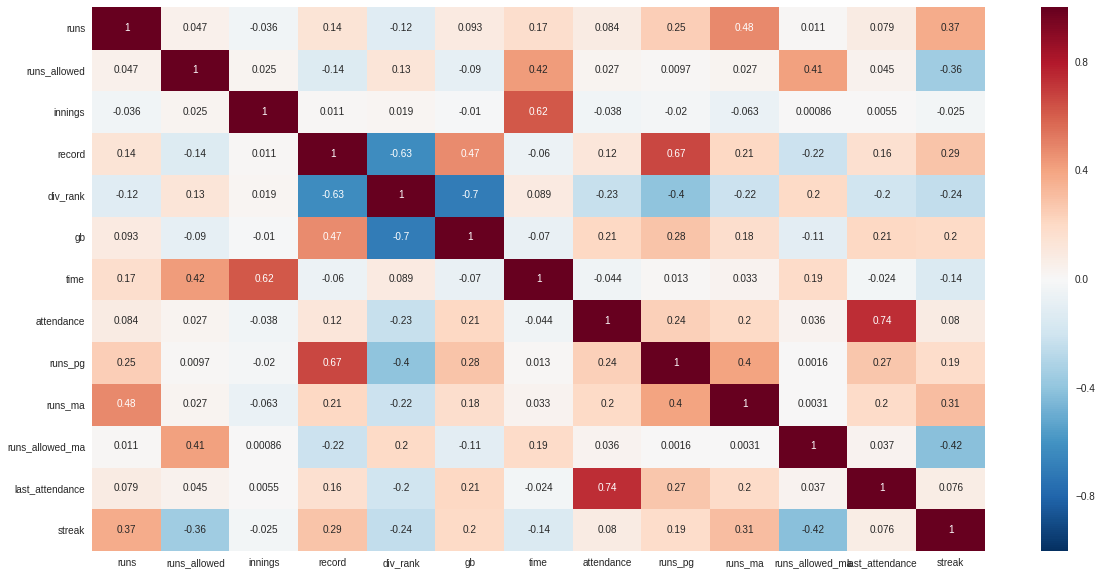

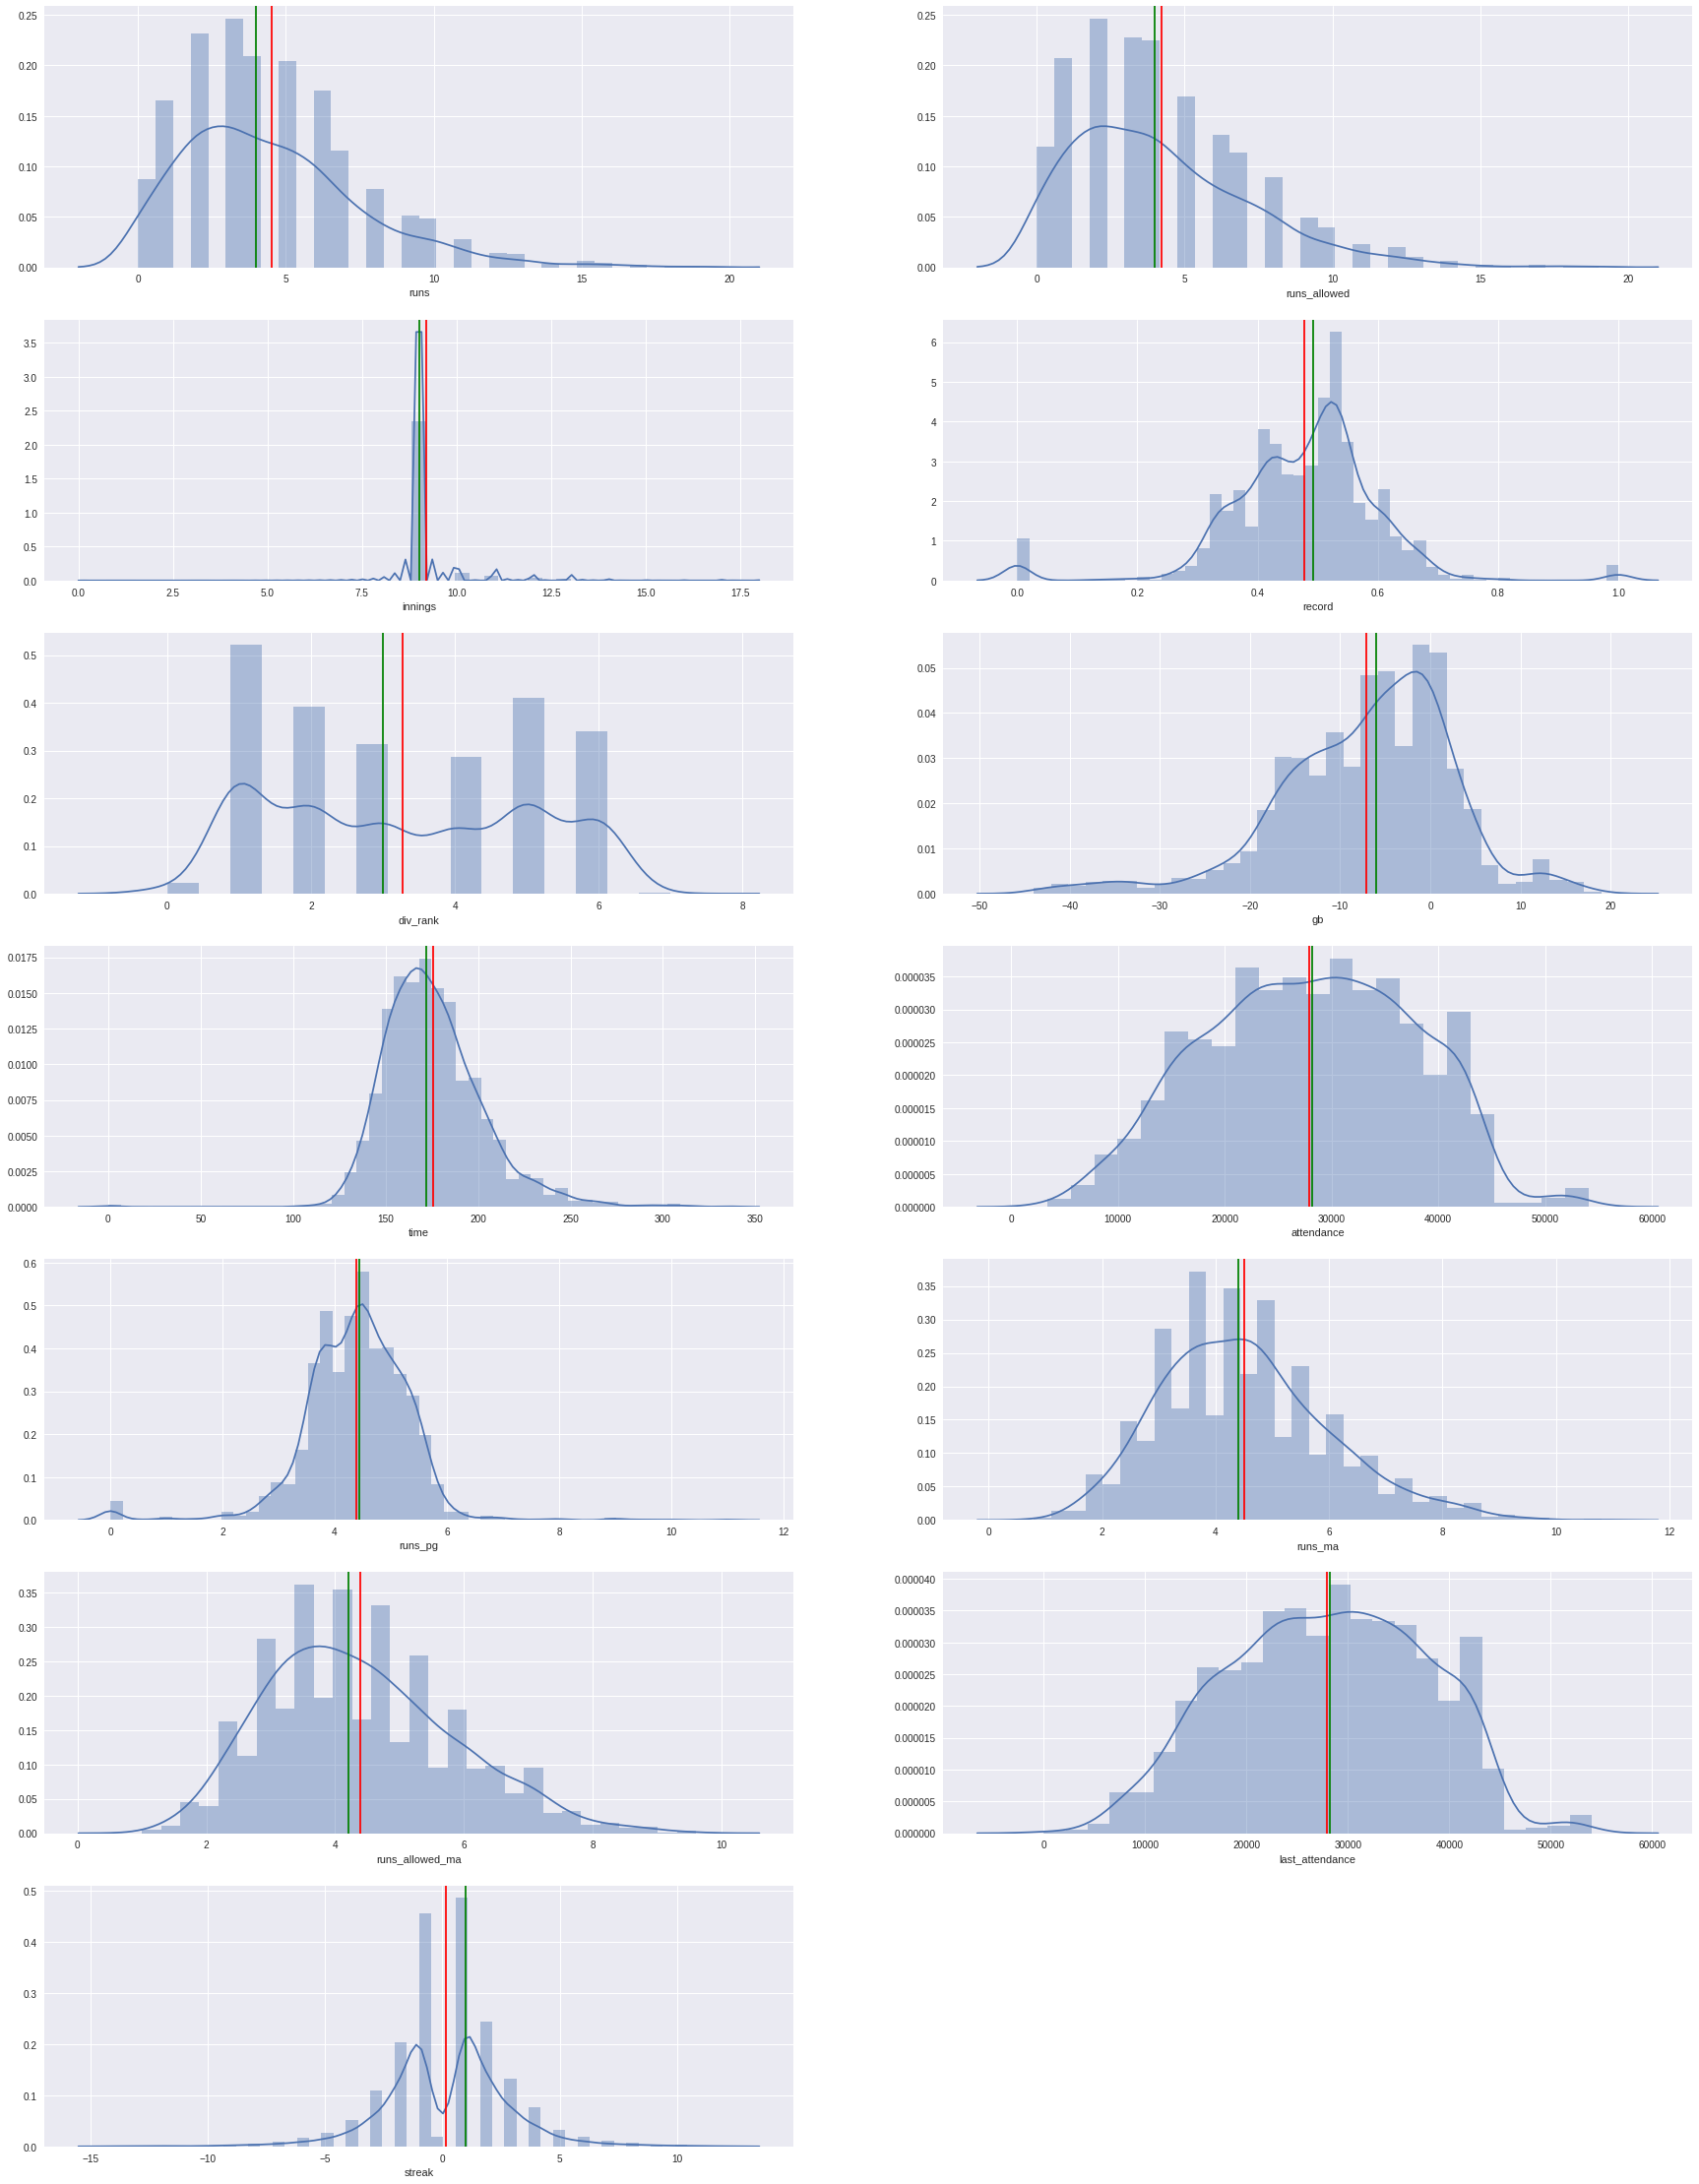

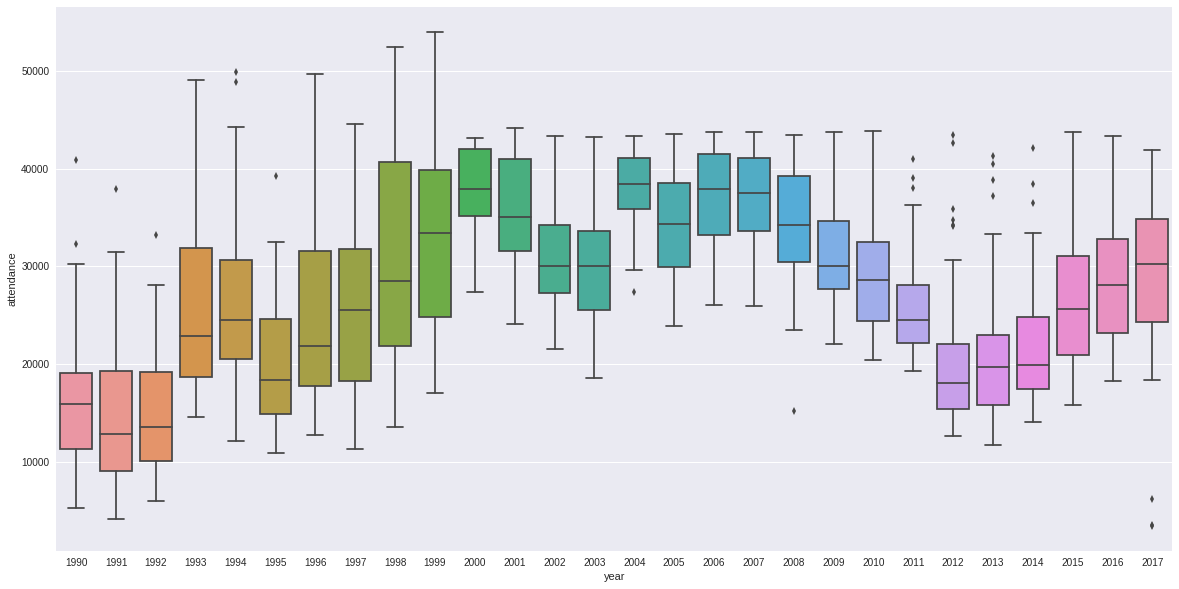

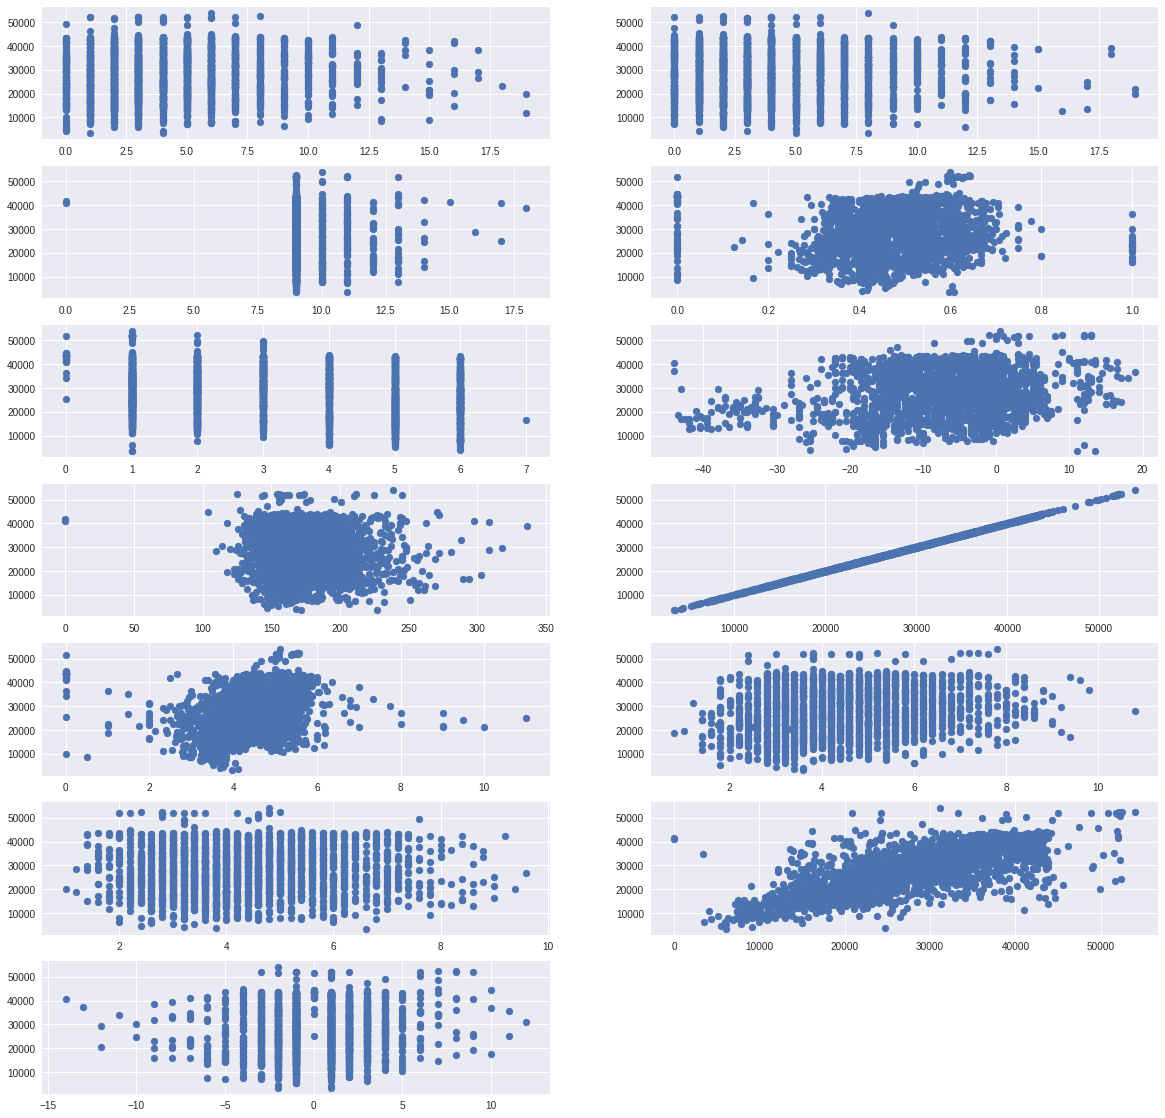

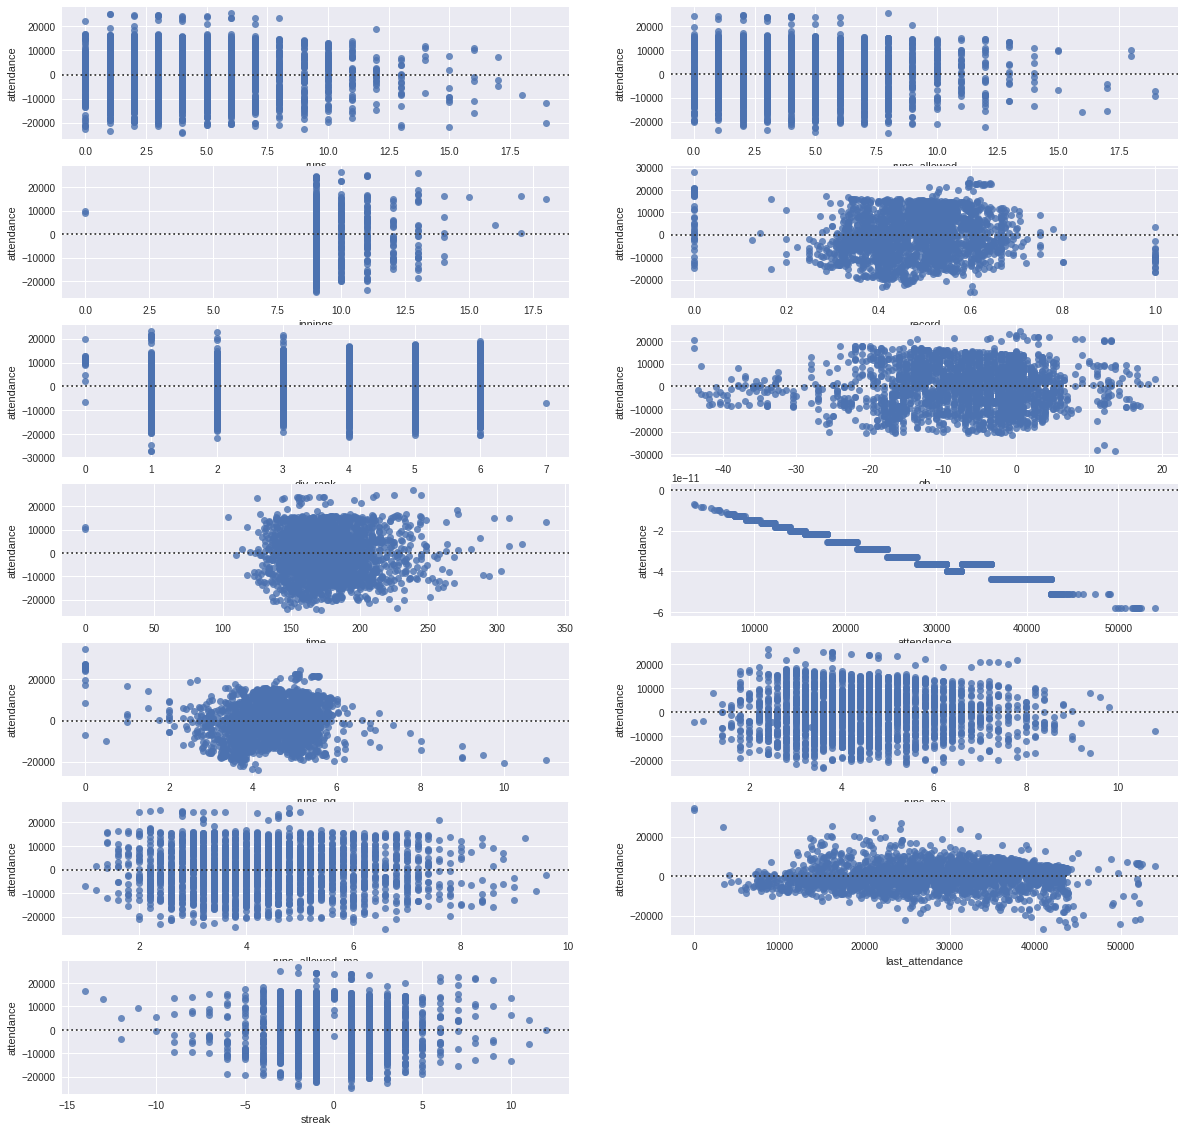

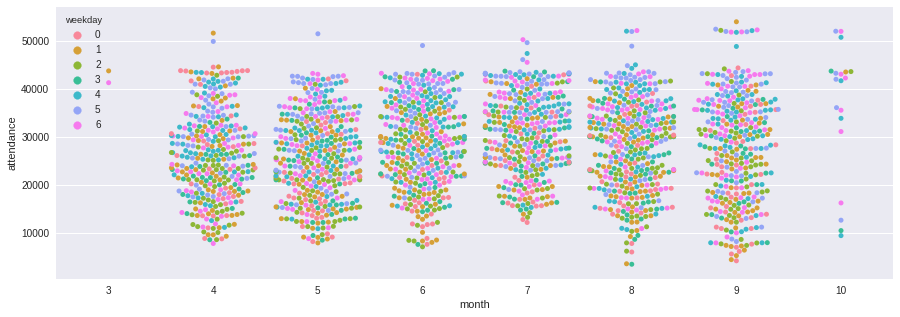

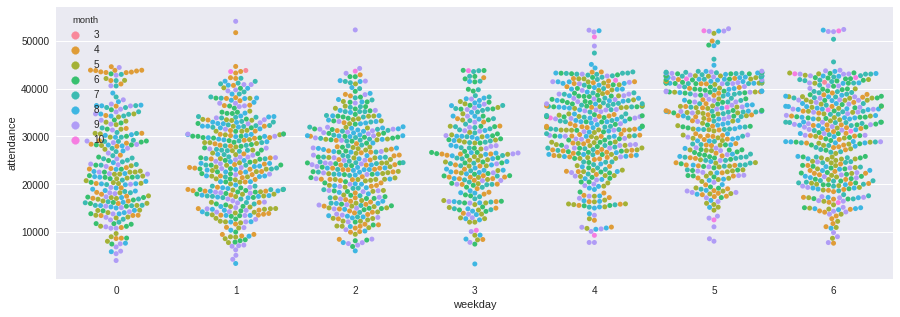

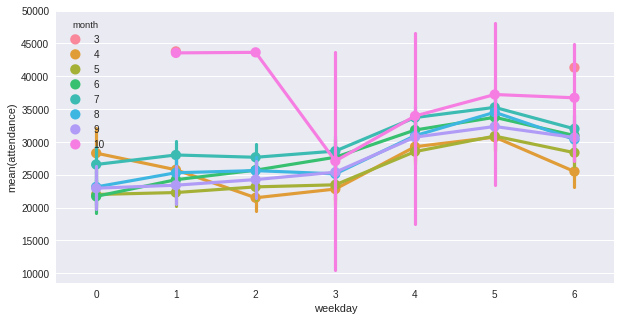

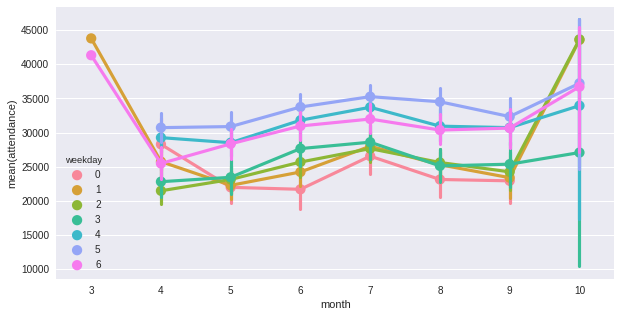

In [12]:
eda(astros_new)

In [13]:
annual_mean_r2(astros_new)

0.52130332387568956

In [14]:
astros_data, feature, target = model_fit_ready(astros_new)

In [15]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.945555,0.670562
Decision_tree_r2,1.000000,0.487577
Random_forest_r2,0.943169,0.691781
Gradient_boost_r2,0.810025,0.706120


In [16]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [18]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.942537,0.671433
Decision_tree_r2,1.000000,0.452631
Random_forest_r2,0.939786,0.661827
Gradient_boost_r2,0.810025,0.706511


In [19]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))))
Feature top 10 ranking:
1. last_attendance (0.838064)
2. F (0.052834)
3. runs_pg (0.032284)
4. SA (0.031854)
5. M (0.013306)
6. record (0.012428)
7. gb (0.011223)
8. sep (0.003804)
9. 2016 (0.002475)
10. april (0.001058)


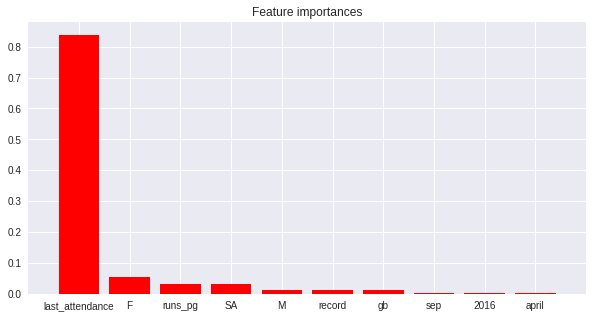

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.744294)
2. F (0.049045)
3. runs_pg (0.035167)
4. SA (0.028903)
5. record (0.022053)
6. M (0.017629)
7. gb (0.017359)
8. div_rank (0.011928)
9. time (0.011291)
10. runs_allowed_ma (0.009336)


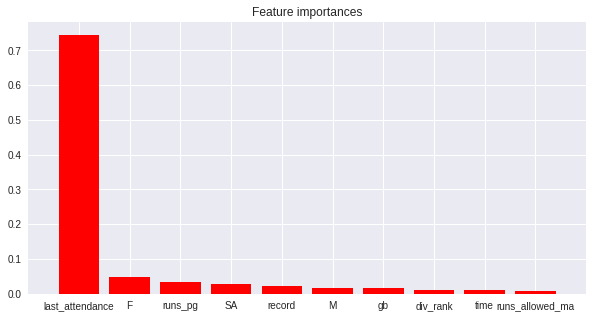

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.179908)
2. runs_pg (0.055572)
3. record (0.047038)
4. F (0.041194)
5. runs_ma (0.040714)
6. gb (0.034117)
7. time (0.033705)
8. SA (0.032515)
9. runs (0.025709)
10. M (0.023055)


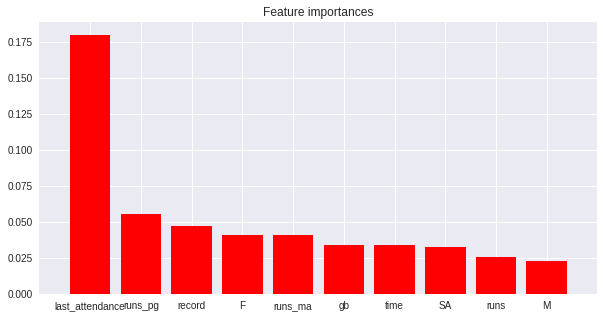

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0,
         max_samples=0.90000000000000002, n_estimators=25, n_jobs=-1,
         oob_score=False, random_state=None, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.623899)
2. double_header (0.037260)
3. gb (0.034348)
4. opening_day (0.032799)
5. record (0.028631)
6. runs_allowed_ma (0.020915)
7. runs_ma (0.020555)
8. runs_pg (0.019599)
9. streak (0.016423)
10. 1990 (0.015158)


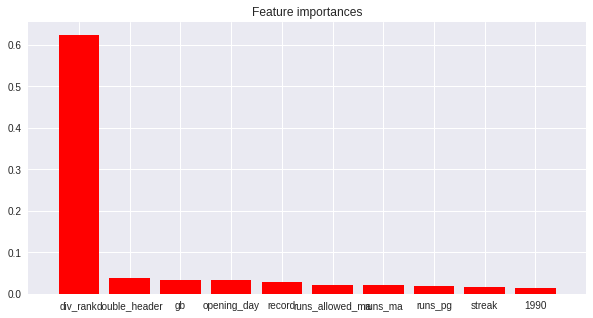

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.945555,0.670562,0.942537,0.671433,0.941767,0.682002
Decision_tree_r2,1.000000,0.487577,1.000000,0.452631,0.697863,0.602239
Random_forest_r2,0.943169,0.691781,0.939786,0.661827,0.777164,0.684849
Gradient_boost_r2,0.810025,0.706120,0.810025,0.706511,0.829806,0.728155


In [21]:
grid_score(feature, target, score_table)

In [22]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [23]:
vif.sort_values('VIF',axis=0,ascending=False)[-16:-1]

,VIF,features
0,6.251652,div_rank
7,4.683718,runs_pg
2,4.649621,gb
4,4.349989,record
54,3.035757,last_attendance
58,2.880060,time
56,2.582307,runs_allowed
57,2.357711,innings
8,2.334067,streak
55,2.330972,runs


In [24]:
vif_feature = feature_sca.drop(['div_rank','runs_pg','record','gb'],axis=1)

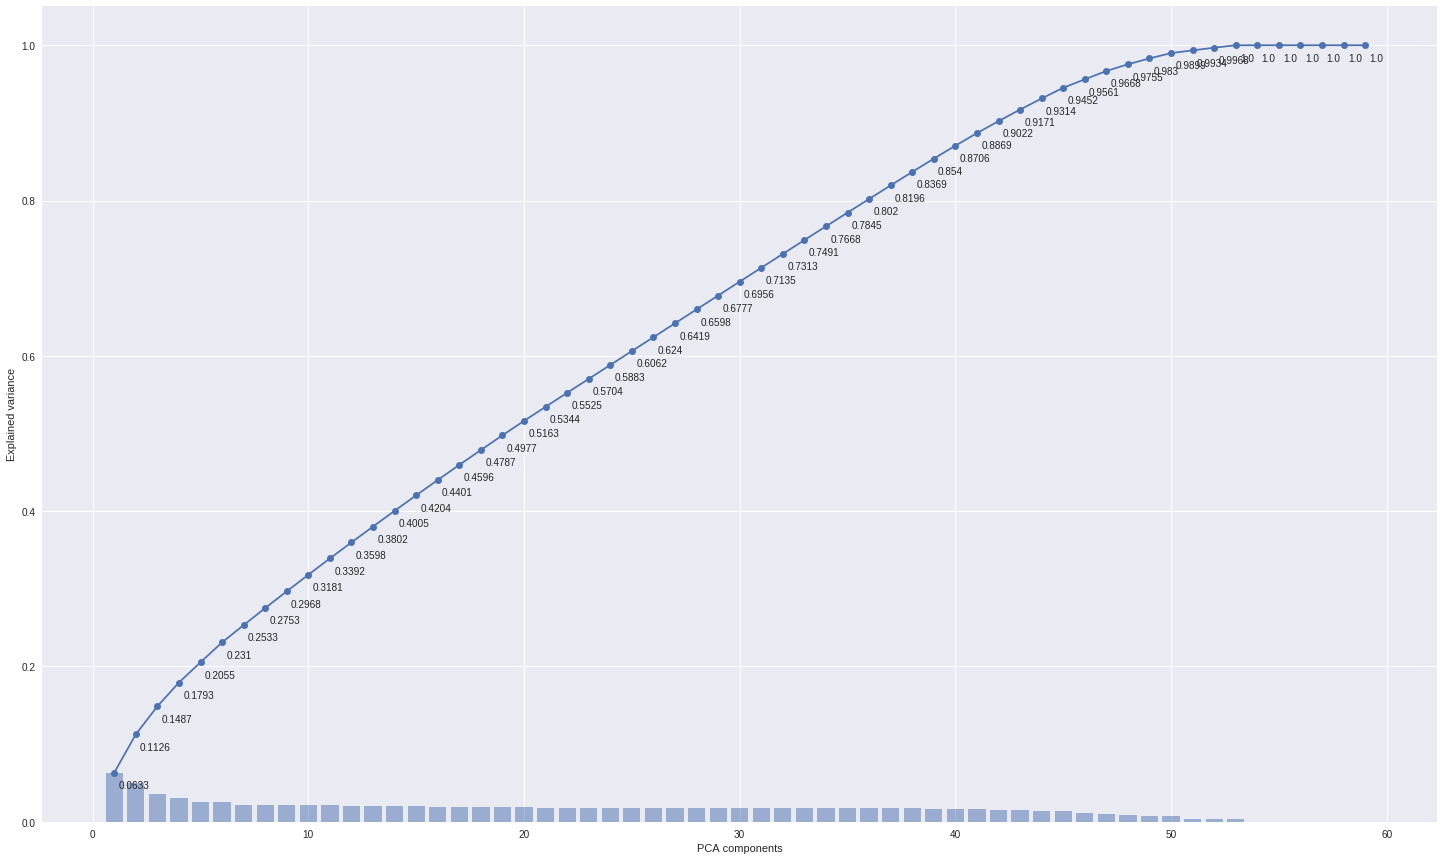

In [25]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,60)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [91]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,1.000000,0.002232
Support Vector Machine,0.752512,0.712732


In [93]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [95]:
drop_list

,f_score,p_value
double_header,3.475848,0.062402
runs_allowed_ma,2.848252,0.091613
1994,1.422342,0.233145
2010,0.659170,0.416939
2015,1.639394,0.200542
2016,0.269812,0.603509
2017,2.760436,0.096762
june,1.592575,0.207090
aug,0.241661,0.623058
sep,0.749260,0.386803


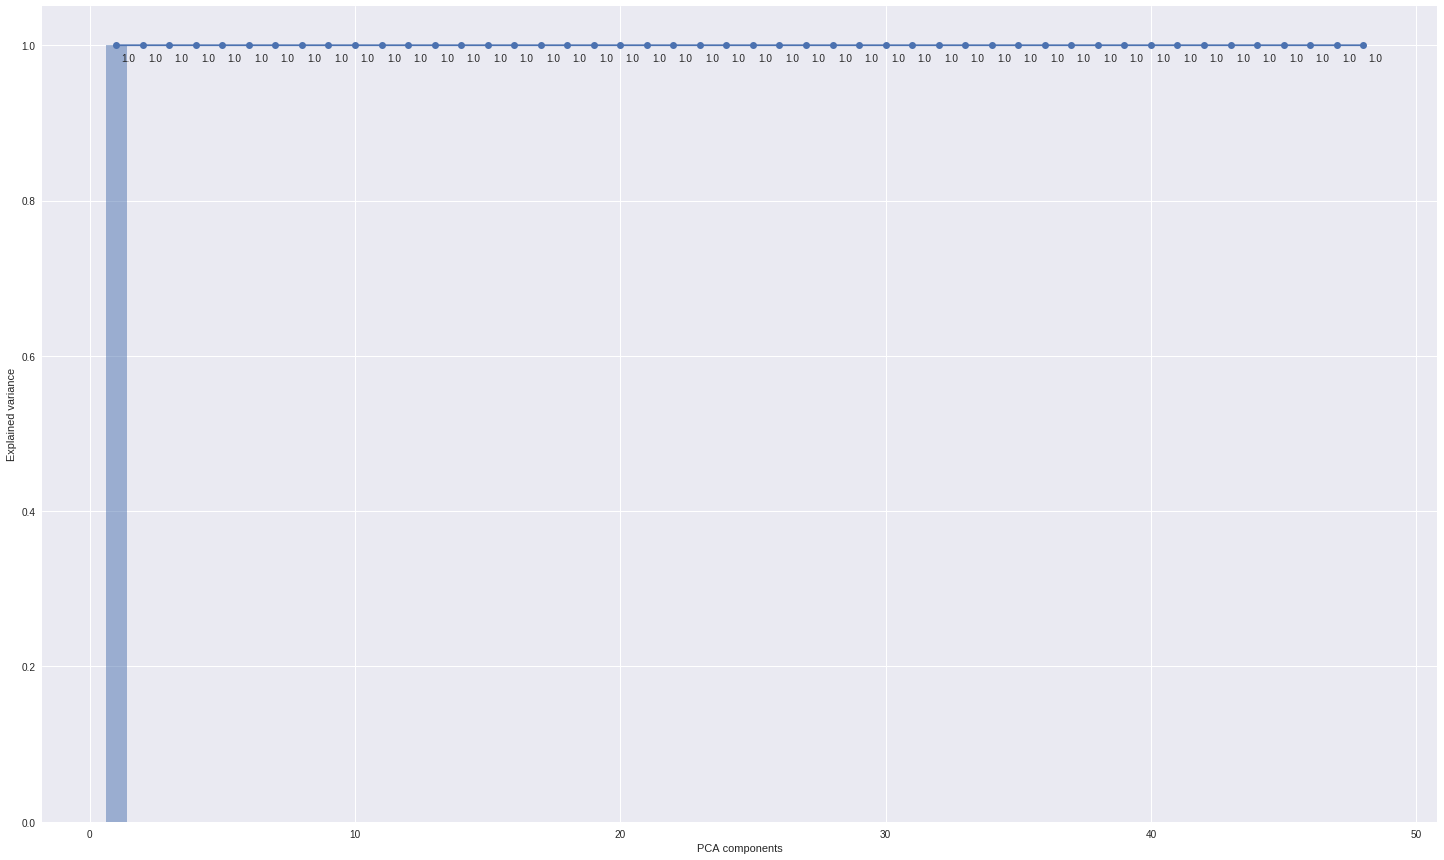

In [87]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,49)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [90]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.003354,0.000000
Support Vector Machine,0.747672,0.721027
